In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from scipy import stats
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load datasets
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
print(movies.head())
print(ratings.head())
print(tags.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferre

In [4]:
average_ratings = ratings.groupby('movieId')['rating'].mean()
popular_movies = average_ratings.sort_values(ascending=False).head(10)
print(popular_movies)

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
6201      5.0
102217    5.0
102084    5.0
6192      5.0
145994    5.0
Name: rating, dtype: float64


In [5]:
rating_counts = ratings.groupby('movieId')['rating'].count()
most_rated_movies = rating_counts.sort_values(ascending=False).head(10)
print(most_rated_movies)

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64


In [6]:
tag_counts = tags['tag'].value_counts()
common_tags = tag_counts.head(10)
print(common_tags)


In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64


In [7]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
yearly_ratings = ratings.groupby('year')['rating'].mean()
print(yearly_ratings)


year
1996    3.535927
1997    3.727557
1998    3.435897
1999    3.772448
2000    3.392506
2001    3.512239
2002    3.606958
2003    3.499377
2004    3.506099
2005    3.431533
2006    3.487928
2007    3.309039
2008    3.656746
2009    3.392496
2010    3.463494
2011    3.784024
2012    3.641323
2013    3.877404
2014    3.510771
2015    3.513830
2016    3.686334
2017    3.348805
2018    3.389062
Name: rating, dtype: float64


In [8]:
unique_user_ids = ratings['userId'].nunique()

print(f"Number of unique userId values: {unique_user_ids}")

Number of unique userId values: 610


In [9]:
movie_rating_counts = ratings.groupby('movieId')['rating'].count()

In [10]:
most_rated_movie_id = movie_rating_counts.idxmax()
most_rated_movie_count = movie_rating_counts.max()

In [11]:
print(f"Movie ID with the maximum number of ratings: {most_rated_movie_id}")
print(f"Number of ratings: {most_rated_movie_count}")

Movie ID with the maximum number of ratings: 356
Number of ratings: 329


In [12]:
most_rated_movie = movies[movies['movieId'] == most_rated_movie_id]

In [13]:
print(f"Movie Title: {most_rated_movie['title'].values[0]}")
print(f"Genre: {most_rated_movie['genres'].values[0]}")

Movie Title: Forrest Gump (1994)
Genre: Comedy|Drama|Romance|War


In [14]:
movie_title = "Matrix, The (1999)"
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

In [15]:
movie_tags = tags[tags['movieId'] == movie_id]

In [16]:
unique_tags = movie_tags['tag'].unique()
print(f"Tags for '{movie_title}':")
print(unique_tags)

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [17]:
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

In [18]:
movie_ratings = ratings[ratings['movieId'] == movie_id]


In [19]:
average_rating = movie_ratings['rating'].mean()

print(f"Average rating for '{movie_title}': {average_rating:.2f}")

Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


In [20]:
movie_title = "Fight Club (1999)"
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

In [21]:
fight_club_ratings = ratings[ratings['movieId'] == movie_id]

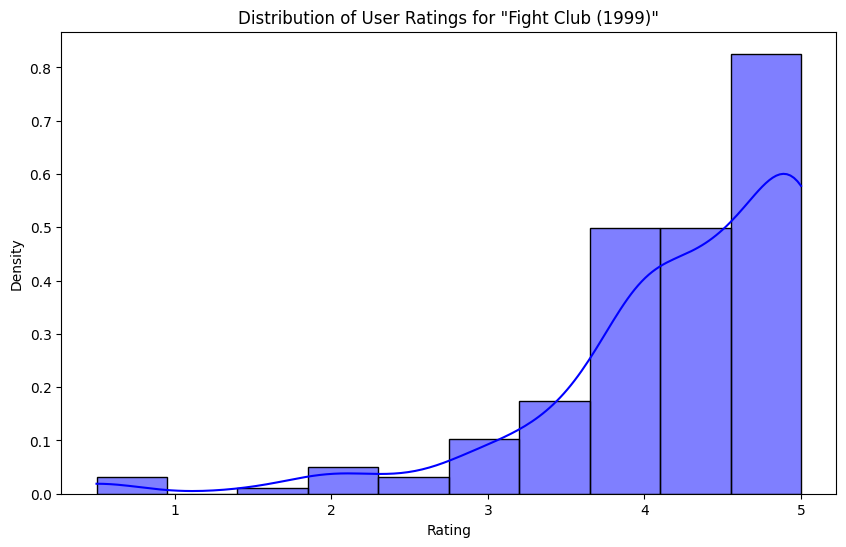

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True, stat='density', color='blue')
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

In [23]:
skewness = stats.skew(fight_club_ratings['rating'])
print(f"Skewness of the rating distribution: {skewness:.2f}")

Skewness of the rating distribution: -1.85


In [24]:
if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is approximately normal.")

The distribution is left-skewed.


In [25]:
# Group by movieId and calculate count and mean of ratings
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Filter movies with more than 50 ratings
ratings_filtered = ratings_grouped[ratings_grouped['count'] > 50]

# Merge with movies DataFrame
movies_filtered = pd.merge(ratings_filtered, movies, on='movieId')

most_popular_movie = movies_filtered.loc[movies_filtered['mean'].idxmax()]

In [26]:
print(f"Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean']:.2f}")
print(f"Number of Ratings: {most_popular_movie['count']}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


In [27]:
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Filter movies with more than 50 ratings
ratings_filtered = ratings_grouped[ratings_grouped['count'] > 50]

# Merge with movies DataFrame
movies_filtered = pd.merge(ratings_filtered, movies, on='movieId')

# Sort by number of ratings and select top 5
top_5_movies = movies_filtered.sort_values(by='count', ascending=False).head(5)


In [28]:
print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'count']])

Top 5 popular movies based on number of user ratings:
                                title  count
61                Forrest Gump (1994)    329
53   Shawshank Redemption, The (1994)    317
49                Pulp Fiction (1994)    307
99   Silence of the Lambs, The (1991)    279
248                Matrix, The (1999)    278


In [29]:
# Group by movieId and calculate count and mean of ratings
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Filter movies with more than 50 ratings
ratings_filtered = ratings_grouped[ratings_grouped['count'] > 50]

# Merge with movies DataFrame
movies_filtered = pd.merge(ratings_filtered, movies, on='movieId')

# Filter for Sci-Fi genre
sci_fi_movies = movies_filtered[movies_filtered['genres'].str.contains('Sci-Fi')]

# Sort by number of ratings and select the third most popular
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]


In [30]:
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238


In [31]:
print("Columns in links.csv:", links.columns)

Columns in links.csv: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [32]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')  # Path to your movies.csv file
ratings = pd.read_csv('ratings.csv')  # Path to your ratings.csv file

# Calculate the number of ratings per movie
ratings_count = ratings.groupby('movieId').size().reset_index(name='count')

# Filter movies with more than 50 ratings
filtered_movies = ratings_count[ratings_count['count'] > 50]

# Merge with movies dataset to get movie details
filtered_movies_df = pd.merge(filtered_movies, movies, on='movieId')

# Save the filtered movies to a CSV file
filtered_movies_df.to_csv('movies_filtered.csv', index=False)

print("Filtered movies saved to 'movies_filtered.csv'.")


Filtered movies saved to 'movies_filtered.csv'.


In [34]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

# Define the scrapper function to fetch IMDB rating
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Chrome/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Chrome/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    
    return float(imdb_rating.text) if imdb_rating else np.nan

# Load the datasets
links = pd.read_csv('links.csv')  # Make sure to have the correct path to your 'links.csv' file
movies_filtered = pd.read_csv('movies_filtered.csv')  # This should contain movies with more than 50 ratings

# Merge the links with the filtered movies data
movies_with_links = pd.merge(movies_filtered, links, on='movieId')

# Dictionary to store IMDB ratings
imdb_ratings = {}

# Iterate through movies and get IMDB ratings
for index, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']  # Ensure this is the correct column name from links.csv
    rating = scrapper(imdb_id)
    imdb_ratings[row['movieId']] = rating
    print(f"Fetched IMDB rating for movieId {row['movieId']}: {rating}")

# Find the movie with the highest IMDB rating
highest_rated_movie_id = max(imdb_ratings, key=imdb_ratings.get)
highest_rating = imdb_ratings[highest_rated_movie_id]

print(f"MovieId of the movie with the highest IMDB rating: {highest_rated_movie_id}")
print(f"Highest IMDB Rating: {highest_rating:.1f}")


Fetched IMDB rating for movieId 1: nan
Fetched IMDB rating for movieId 2: nan
Fetched IMDB rating for movieId 3: nan
Fetched IMDB rating for movieId 6: nan
Fetched IMDB rating for movieId 7: nan
Fetched IMDB rating for movieId 10: nan
Fetched IMDB rating for movieId 11: nan
Fetched IMDB rating for movieId 16: nan
Fetched IMDB rating for movieId 17: nan
Fetched IMDB rating for movieId 19: nan
Fetched IMDB rating for movieId 21: nan
Fetched IMDB rating for movieId 25: nan
Fetched IMDB rating for movieId 32: nan
Fetched IMDB rating for movieId 34: nan
Fetched IMDB rating for movieId 36: nan
Fetched IMDB rating for movieId 39: nan
Fetched IMDB rating for movieId 47: nan
Fetched IMDB rating for movieId 48: nan
Fetched IMDB rating for movieId 50: nan
Fetched IMDB rating for movieId 62: nan
Fetched IMDB rating for movieId 70: nan
Fetched IMDB rating for movieId 95: nan
Fetched IMDB rating for movieId 104: nan
Fetched IMDB rating for movieId 110: nan
Fetched IMDB rating for movieId 111: nan
Fe

In [35]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

# Define the scrapper function to fetch IMDB rating
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Chrome/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Chrome/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    
    return float(imdb_rating.text) if imdb_rating else np.nan

# Load the datasets
links = pd.read_csv('links.csv')  # Make sure to have the correct path to your 'links.csv' file
movies_filtered = pd.read_csv('movies_filtered.csv')  # This should contain movies with more than 50 ratings

# Filter for "Sci-Fi" movies
sci_fi_movies = movies_filtered[movies_filtered['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Merge the links with the filtered Sci-Fi movies data
sci_fi_movies_with_links = pd.merge(sci_fi_movies, links, on='movieId')

# Dictionary to store IMDB ratings
imdb_ratings = {}

# Iterate through "Sci-Fi" movies and get IMDB ratings
for index, row in sci_fi_movies_with_links.iterrows():
    imdb_id = row['imdbId']  # Ensure this is the correct column name from links.csv
    rating = scrapper(imdb_id)
    imdb_ratings[row['movieId']] = rating
    print(f"Fetched IMDB rating for movieId {row['movieId']}: {rating}")

# Find the "Sci-Fi" movie with the highest IMDB rating
highest_rated_sci_fi_movie_id = max(imdb_ratings, key=imdb_ratings.get)
highest_sci_fi_rating = imdb_ratings[highest_rated_sci_fi_movie_id]

print(f"MovieId of the 'Sci-Fi' movie with the highest IMDB rating: {highest_rated_sci_fi_movie_id}")
print(f"Highest IMDB Rating among 'Sci-Fi' movies: {highest_sci_fi_rating:.1f}")


Fetched IMDB rating for movieId 32: nan
Fetched IMDB rating for movieId 160: nan
Fetched IMDB rating for movieId 172: nan
Fetched IMDB rating for movieId 173: nan
Fetched IMDB rating for movieId 208: nan
Fetched IMDB rating for movieId 260: nan
Fetched IMDB rating for movieId 292: nan
Fetched IMDB rating for movieId 316: nan
Fetched IMDB rating for movieId 329: nan
Fetched IMDB rating for movieId 435: nan
Fetched IMDB rating for movieId 442: nan
Fetched IMDB rating for movieId 480: nan
Fetched IMDB rating for movieId 541: nan
Fetched IMDB rating for movieId 589: nan
Fetched IMDB rating for movieId 673: nan
Fetched IMDB rating for movieId 780: nan
Fetched IMDB rating for movieId 788: nan
Fetched IMDB rating for movieId 924: nan
Fetched IMDB rating for movieId 1097: nan
Fetched IMDB rating for movieId 1127: nan
Fetched IMDB rating for movieId 1196: nan
Fetched IMDB rating for movieId 1199: nan
Fetched IMDB rating for movieId 1200: nan
Fetched IMDB rating for movieId 1206: nan
Fetched IMD